<a href="https://colab.research.google.com/github/WaheedAbbas199/Advance_Calculater-/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the Iris dataset
iris_df = pd.read_csv('Iris.csv')

# Display the first 5 rows of the DataFrame
display(iris_df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


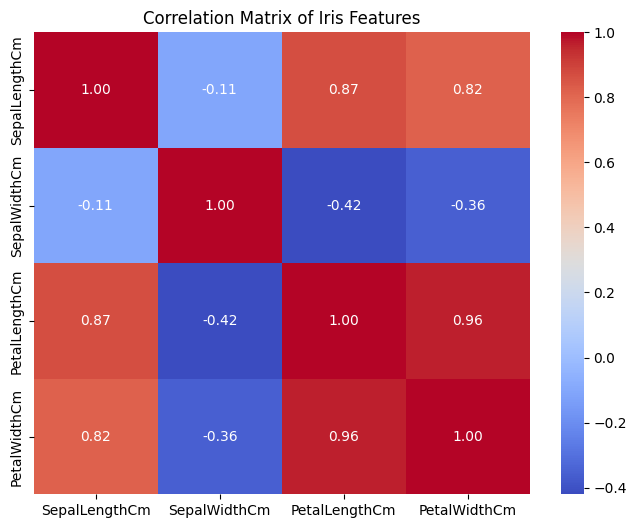

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical feature columns for correlation calculation
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
correlation_matrix = iris_df[features].corr()

# Display the correlation matrix
display(correlation_matrix)

# Optionally, visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Iris Features')
plt.show()

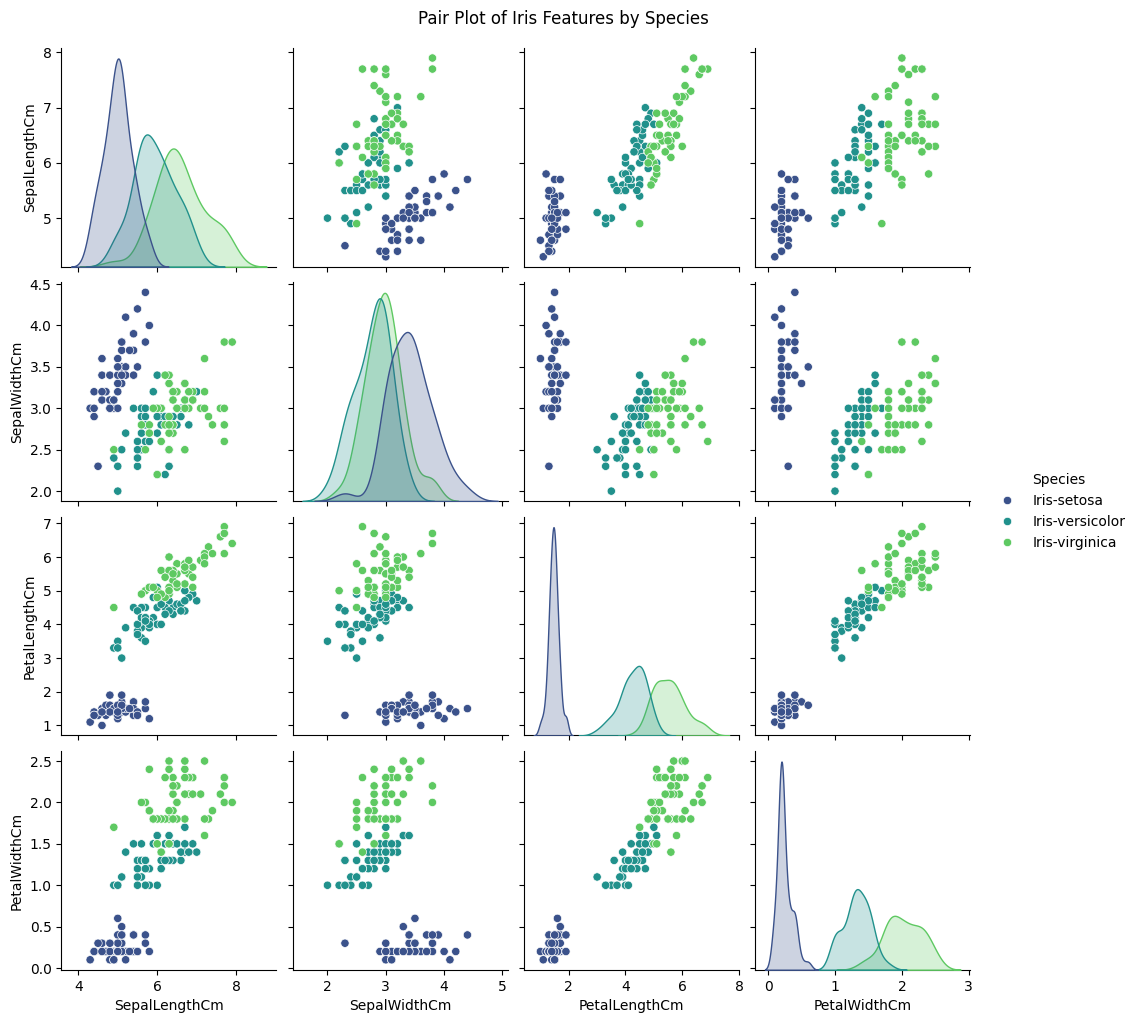

In [5]:
# Create a pairplot to visualize relationships between all features, colored by 'Species'
sns.pairplot(iris_df, hue='Species', vars=features, palette='viridis')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02) # Adjust title position
plt.show()

In [3]:
iris_df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
from sklearn.preprocessing import LabelEncoder

# Identify features (X) and target (y)
X = iris_df[features] # Using the 'features' list defined earlier
y = iris_df['Species']

# Convert species names into numerical labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Original Species names:", y.unique())
print("Encoded Species labels:", le.classes_)
display(pd.DataFrame({'Original': y, 'Encoded': y_encoded}).head())

Original Species names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Encoded Species labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,Original,Encoded
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0


In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Testing set size: 30 samples


In [8]:
from sklearn.linear_model import LogisticRegression

# Choose a classification algorithm (Logistic Regression in this case)
model = LogisticRegression(max_iter=200, random_state=42) # Increased max_iter for convergence

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



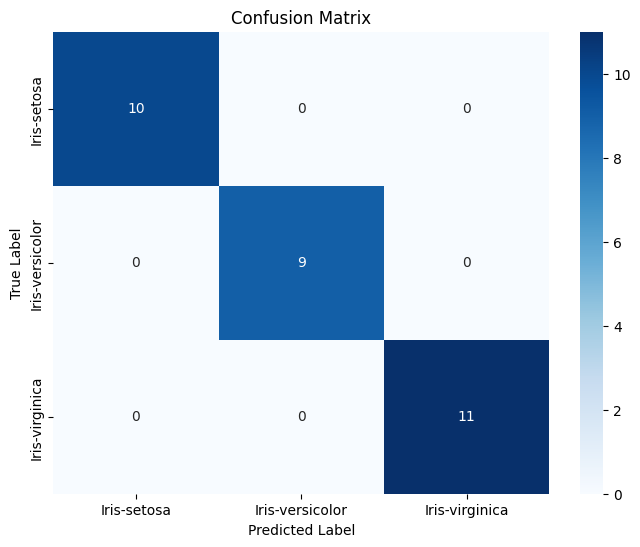

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
import joblib

# Define the filename for saving the model
model_filename = 'iris_logistic_regression_model.pkl'

# Save the trained model to the file
joblib.dump(model, model_filename)

print(f"Model successfully saved to '{model_filename}'")
print("You can load it later using: `loaded_model = joblib.load(model_filename)`")

Model successfully saved to 'iris_logistic_regression_model.pkl'
You can load it later using: `loaded_model = joblib.load(model_filename)`


In [12]:
import joblib
import pandas as pd

# Load the saved model
loaded_model = joblib.load('iris_logistic_regression_model.pkl')
print("Model loaded successfully.")

Model loaded successfully.
